In [21]:
#Step 1: Import the data and coordinates 
#Step 2: Put coordinates into a dataframe and subsequently a geodataframe
#Step 3: Match the coordinates with the object ID (hives)
#Step 4: Project the shapefile and coordinates
#Step 5: Create a function to perform statistical analsysis on the elements
#Step 6: Put buffer around the beehives
#Step 7: Create a graduated symbols map of the point data

import geopandas as gpd
import pandas as pd
import fiona
import rasterstats
import os

In [32]:
#read shapefile
shapefile = gpd.read_file("./Superfund_Shape/Superfund_Shape.shp")

#read coordinate and elements data
hmsdata = pd.read_csv('./Heavy Metal Sheet-Final.csv')
hmsdf = pd.DataFrame(hmsdata)
elementsdf = hmsdf.iloc[: , 3:12].copy()
coord = hmsdf.iloc[: , [12,13]].copy()

#convert coordinates dataframe to geodataframe
coords_gdf = gpd.GeoDataFrame(coord, geometry=gpd.points_from_xy(hmsdf.Coordinate2, hmsdf.Coordinate1))

In [34]:
elementsdf

,Cu,Cd,Fe,Mg,Ni,Hg,Ar,Sn,Sb
0,1.737,1.912,8.197,-2.270,1.118,1.509,-158.011,26.721,11.751
1,1.407,-0.335,7.152,-1.174,1.228,2.230,-208.411,29.844,10.650
2,1.097,0.417,6.143,1.033,1.427,1.347,-238.963,36.350,11.637
3,2.481,1.623,4.097,-1.690,1.406,1.359,-104.527,32.370,10.247
4,2.293,-0.864,6.919,0.287,0.958,0.836,-532.669,29.903,10.744
5,1.639,1.436,6.470,-1.742,0.786,2.387,-154.251,31.183,13.195
6,2.171,1.199,5.428,-1.112,1.122,0.825,-81.158,31.600,10.654
7,2.556,0.574,4.926,-2.107,0.629,0.677,63.918,25.578,9.677
8,0.468,-1.801,10.502,-1.569,0.607,1.581,78.331,26.634,12.127
9,1.981,1.107,19.858,2.644,0.612,1.942,-268.238,31.557,13.209


In [59]:

def elstats (df):
  """
  Statistics for mean, median, etc. from a pandas datafram
  """
  mean = df.mean()
  stddev = df.std()
  max = df.max()
  min = df.min()
  elnames = df.columns
  for i in range(len(elnames)):
    print(f"{elnames[i]}: mean = {round(mean[i], 2)}, standard deviation = {round(stddev[i], 2)}, max = {round(max[i], 2)}, min = {round(min[i], 2)}")
  


elstats(elementsdf)
  
# def chloropleth_func (beehives, ....):
#   create map

# path = 'C:/Users/larsenh/Downloads/'

# coord_list = []
# with open(path + 'Coordinates.txt') as file:
#     for coordinates in file:
#         temp_list = tuple(coordinates.strip().split('\t'))

# elements_list = []
# with open(path + 'Elements.txt') as file:
#     for ele in file:
#         temp_list = tuple(ele.strip().split('\t'))


# coords_df = pd.DataFrame(new_coords, columns=['Longitude', 'Latitude'])
# coords_gdf = gpd.GeoDataFrame(coords_df, geometry = gpd.points_from_xy(coords_df.Longitude, 
#             coords_df.Latitude))

# elements_df = pd.DataFrame(new_elements, columns=['Longitude', 'Latitude'])
# elements_gdf = gpd.GeoDataFrame(elements_df, geometry = gpd.points_from_xy(elements_df.Longitude, 
#             elements_df.Latitude))


# crs = {'init': 'epsg:4326'}
# coords_gdf = gpd.GeoDataFrame(coords_gdf, crs = crs)
# elements_gdf = gpd.GeoDataFrame(elements_gdf, crs = crs)

Cu: mean = 1.78, standard deviation = 0.66, max = 2.56, min = 0.47
Cd: mean = 0.53, standard deviation = 1.19, max = 1.91, min = -1.8
Fe: mean = 7.97, standard deviation = 4.54, max = 19.86, min = 4.1
Mg: mean = -0.77, standard deviation = 1.59, max = 2.64, min = -2.27
Ni: mean = 0.99, standard deviation = 0.32, max = 1.43, min = 0.61
Hg: mean = 1.47, standard deviation = 0.59, max = 2.39, min = 0.68
Ar: mean = -160.4, standard deviation = 174.94, max = 78.33, min = -532.67
Sn: mean = 30.17, standard deviation = 3.23, max = 36.35, min = 25.58
Sb: mean = 11.39, standard deviation = 1.2, max = 13.21, min = 9.68


0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
5    Polygon
6    Polygon
7    Polygon
8    Polygon
9    Polygon
dtype: object


<AxesSubplot:>

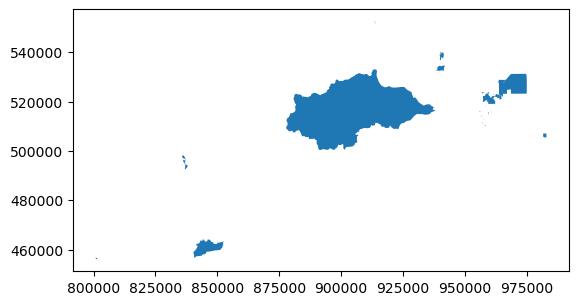

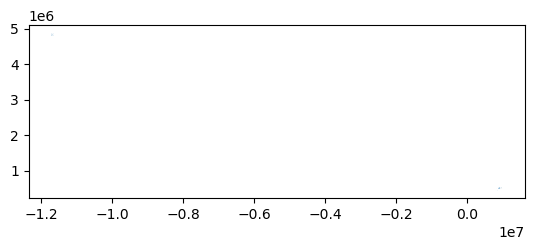

In [16]:
#set the initial geodataframe crs
coords_gdf.crs = "EPSG:26954"

#convert coordinates to a Colorado specific projection
# coords_gdf = coords_gdf.to_crs('EPSG:3857')
shapefile = shapefile.to_crs("EPSG:26954")

#buffer for 3 miles in meters (I think the buffer uses the CRS measurement for calculation, the CRS for EPSG:26954 is in meters so
  #it wants meters for the buffer function
buffer = coords_gdf.buffer(4828.03)
buffer = gpd.GeoDataFrame(gpd.GeoSeries(buffer))
buffer = buffer.rename(columns={0: 'geometry'})
buffer = buffer.set_geometry('geometry')


#Superfund sites that fall within one of the beehive buffers?
# for hive in beehives_buffer:
#   hive.intersection(shapefile)
# intersection = gpd.overlay(buffer, shapefile, how='union')

# intersection.plot()
  
# #Export files to shapefile
# beehives_gdf.to_file('beehive_locations.shp')
# beehives_buffer.to_file('beehives_buffer.shp')
